In [1]:
import matplotlib.pyplot as plt
import seaborn as sns # 데이터셋 가져오는 용도

# 그래프 스타일 설정
plt.style.use('default')
sns.set_palette('pink')
# 한글이 깨짐 -> 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 음수 기호도 깨짐
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 기본그래프 만들기 
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


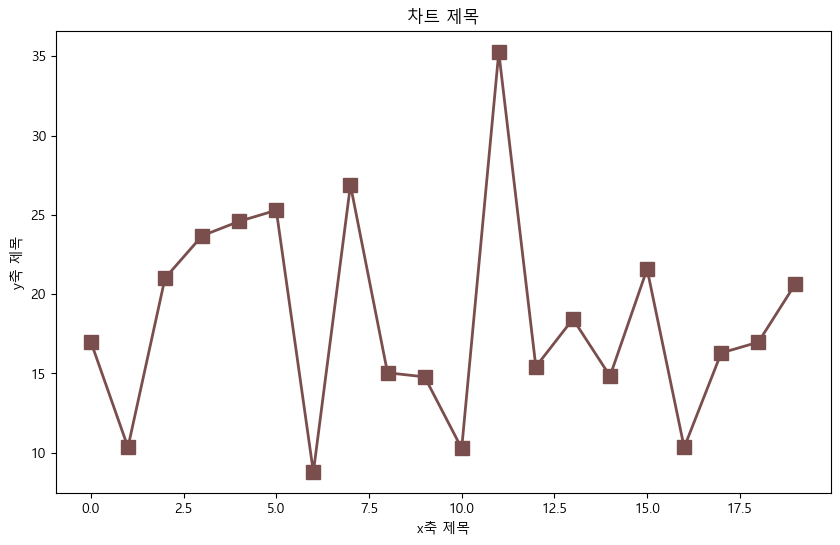

In [3]:
# 꺾은선 그래프
plt.figure(figsize=(10, 6)) # 도화지라고 생각
plt.plot(tips['total_bill'][:20], marker='s', linewidth=2, markersize=10) # 선 그래프
plt.title('차트 제목') # 차트 제목 설정
plt.xlabel('x축 제목') # x 축 제목
plt.ylabel('y축 제목') # y 축 제목

plt.show() # 그래프 보기 

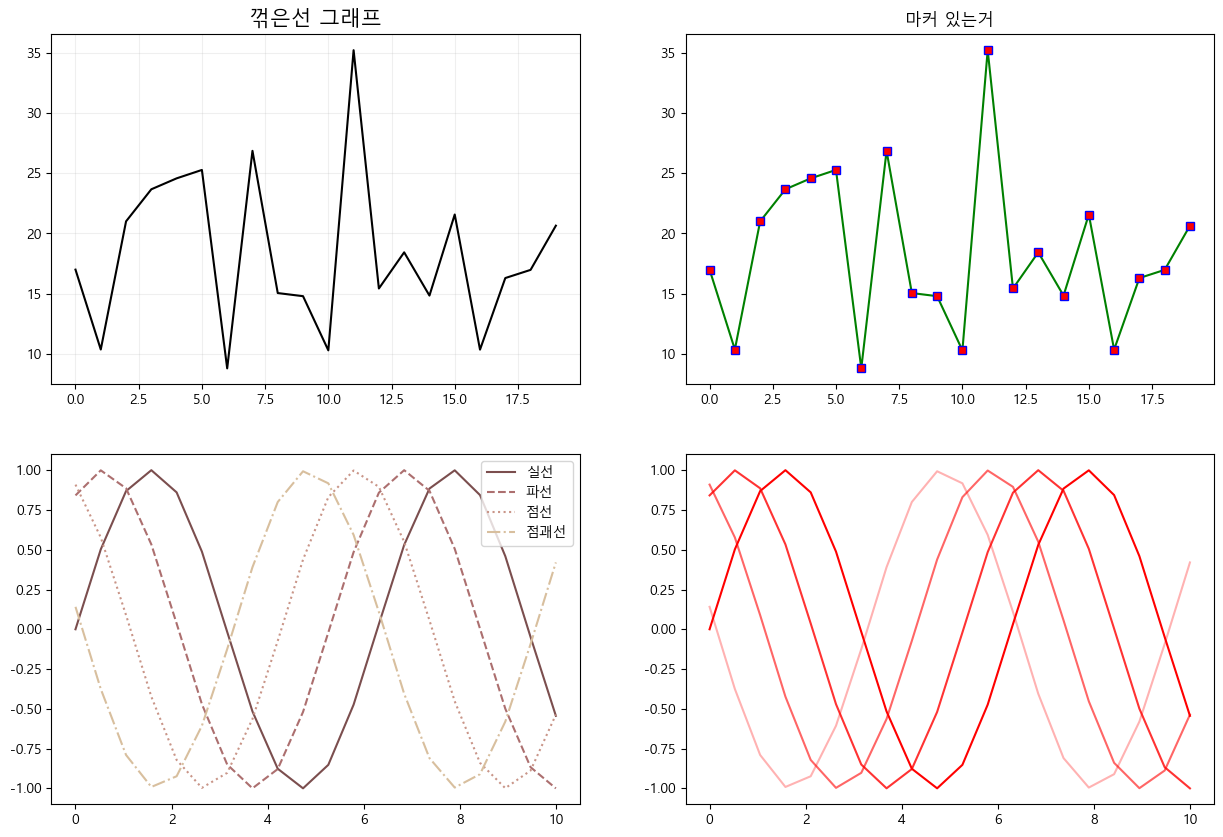

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax[0, 0].plot(tips['total_bill'][:20], color='black')
ax[0, 0].set_title('꺾은선 그래프', fontsize=15)
ax[0, 0].grid(True, alpha=0.2)

# 마커가 있는 그래프
ax[0, 1].plot(tips['total_bill'][:20], marker='s', color='green',
              markerfacecolor='red', ## 안쪽 색만 바꿈
              markeredgecolor='blue' ## 테두리 색만 바꿈 
              )
ax[0, 1].set_title('마커 있는거')

import numpy as np
# 선 종류도 다르게 가능함 ('-' '--' ':' '-')
x = np.linspace(0, 10, 20) # 차트로 사용할 데이터
ax[1, 0].plot(x, np.sin(x), linestyle='-', label='실선')
ax[1, 0].plot(x, np.sin(x+1), linestyle='--', label='파선')
ax[1, 0].plot(x, np.sin(x+2), linestyle=':', label='점선')
ax[1, 0].plot(x, np.sin(x+3), linestyle='-.', label='점괘선')
ax[1, 0].legend() # 범례 표시

# 선 투명도 지정
ax[1, 1].plot(x, np.sin(x), alpha=1, color='red', label='투명도 1')
ax[1, 1].plot(x, np.sin(x+1), alpha=0.8, color='red', label='투명도 0.8')
ax[1, 1].plot(x, np.sin(x+2), alpha=0.6, color='red', label='투명도 0.6')
ax[1, 1].plot(x, np.sin(x+3), alpha=0.3, color='red', label='투명도 0.3')

plt.show()

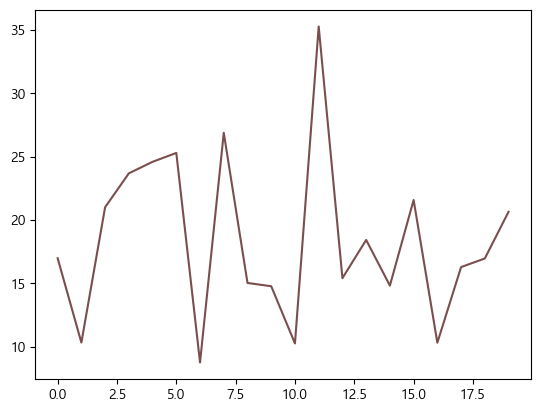

In [5]:
fig, ax = plt.subplots()
ax.plot(tips['total_bill'][:20])

plt.show()

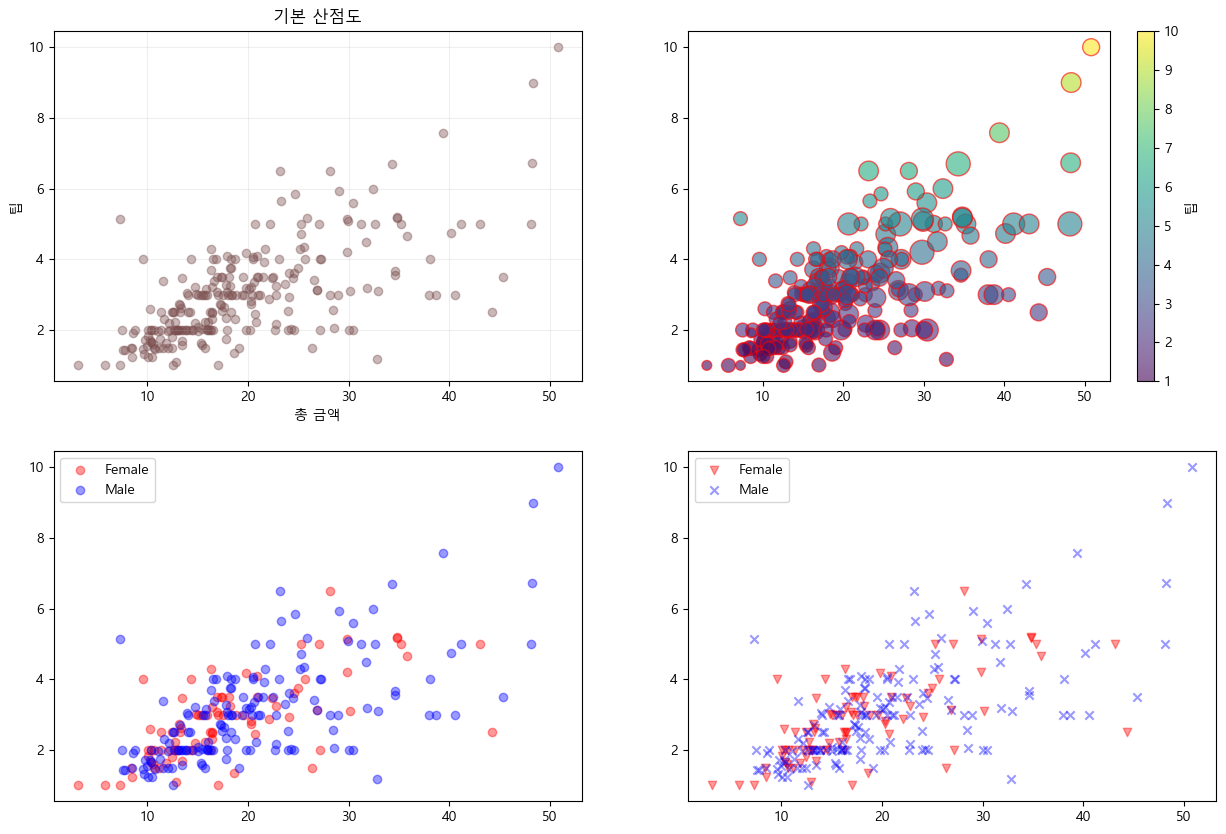

In [6]:
# 산점도
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
# 기본 산점도
ax[0, 0].scatter(tips['total_bill'], tips['tip'], alpha=0.4)
ax[0, 0].set_title('기본 산점도')
ax[0, 0].set_xlabel('총 금액')
ax[0, 0].set_ylabel('팁')
ax[0, 0].grid(True, alpha=0.2)

# 크기, 색
scatter = ax[0, 1].scatter(tips['total_bill'], tips['tip'],
                 s=tips['size'] * 50, # 테이블당 인원수 * 50만큼 크기가 지정
                 c=tips['tip'],
                 cmap='viridis',  # 컬러맵 (사이트가서 보고 정함)
                 alpha=0.6, # 투명도
                 edgecolors='red', # 테두리 색
                 linewidths=1 # 테두리 두께 
                 )
plt.colorbar(scatter, ax=ax[0, 1], label='팁')

# 성별별 총액과 팁
colors = {'Male':'blue', 'Female':'red'}

for s in tips['sex'].unique():
  data = tips[ tips['sex'] == s ]
  ax[1, 0].scatter(data['total_bill'], data['tip'],
                   c=colors[s], label=s, alpha=0.4  
                   )
ax[1, 0].legend()

# 마커 변경
markers = {'Male' : 'x', 'Female' : 'v'}

colors = {'Male':'blue', 'Female':'red'}

for s in tips['sex'].unique():
  data = tips[ tips['sex'] == s ]
  ax[1, 1].scatter(data['total_bill'], data['tip'],
                   c=colors[s], label=s, alpha=0.4, marker=markers[s]  
                   )
ax[1, 1].legend()

plt.show()

C:\Users\M\AppData\Local\Temp\ipykernel_7040\3097904079.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_total = tips.groupby('day')['total_bill'].sum()
C:\Users\M\AppData\Local\Temp\ipykernel_7040\3097904079.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(['sex', 'day'])['total_bill'].sum().unstack()


KeyError: 'Male'

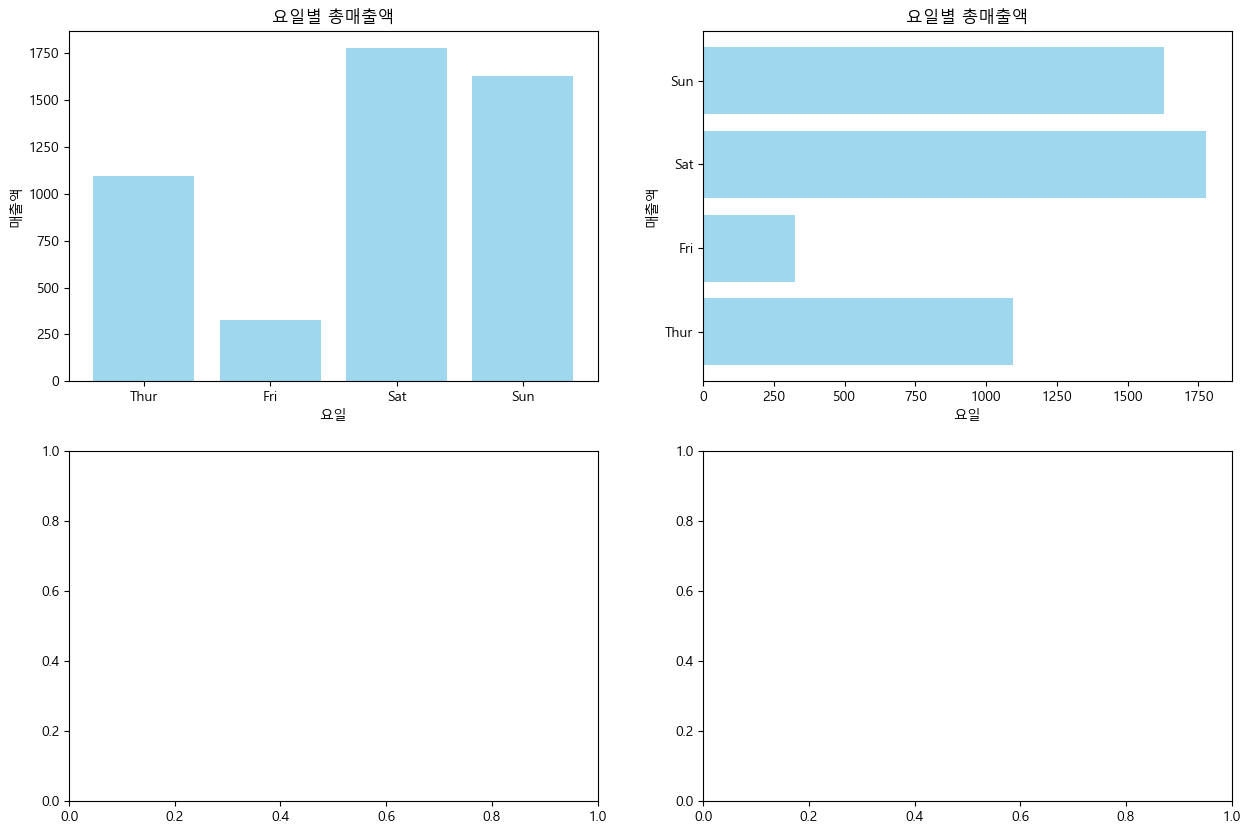

In [7]:
# 막대 그래프
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# 요일별 총매출액
day_total = tips.groupby('day')['total_bill'].sum()
ax[0, 0].bar(day_total.index, day_total.values, color='skyblue', alpha=0.8)
ax[0, 0].set_title('요일별 총매출액')
ax[0, 0].set_xlabel('요일')
ax[0, 0].set_ylabel('매출액')

ax[0, 1].barh(day_total.index, day_total.values, color='skyblue', alpha=0.8)
ax[0, 1].set_title('요일별 총매출액')
ax[0, 1].set_xlabel('요일')
ax[0, 1].set_ylabel('매출액')

# 성별별 요일별 매출액 합계 
tips.groupby(['sex', 'day'])['total_bill'].sum().unstack()
x = np.arange(len(data.columns))
width=0.35

ax[1, 0].bar( x - width / 2, data.loc['Male'], width)
ax[1, 0].bar( x - width / 2, data.loc['Female'], width)

ax[1, 0].set.xticks(x)
ax[1, 0].set_xticklabels(data.columns)

plt.show()

In [ ]:
tips.pivot_table(index='day', columns='sex', values='total_bill', aggfunc='sum')

C:\Users\M\AppData\Local\Temp\ipykernel_14484\2312124234.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips.pivot_table(index='day', columns='sex', values='total_bill', aggfunc='sum')


sex,Male,Female
day,,
Thur,561.44,534.89
Fri,198.57,127.31
Sat,1227.35,551.05
Sun,1269.46,357.70


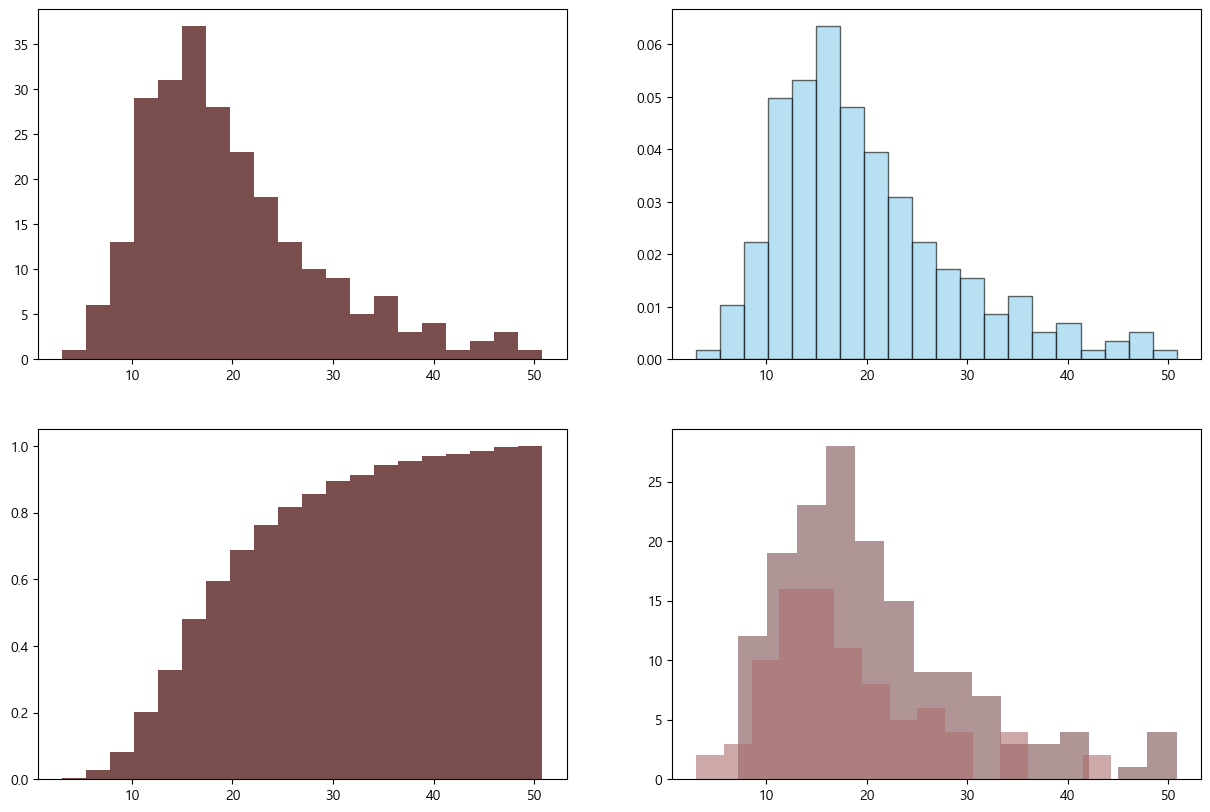

In [ ]:
# 히스토그램
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# 기본 ( bins : 구간 개수 )
ax[0, 0]. hist(tips['total_bill'], bins=20)

ax[0, 1].hist(tips['total_bill'], bins=20, color='skyblue', edgecolor='black', alpha=0.6,
              density=True # 밀도 정규화 ( y축이 확률 밀도로 표시, 막대들의 합이 1이 되도록 정규화 )
              )

ax[1, 0].hist(                                    # 누적 히스토그램
  tips['total_bill'], bins=20, density=True, cumulative=True
)

male = tips[ tips['sex']=='Male']['total_bill']
female = tips[ tips['sex']=='Female']['total_bill']

ax[1, 1].hist(male, bins=15, alpha=0.6)
ax[1, 1].hist(female, bins=15, alpha=0.6)


plt.show()

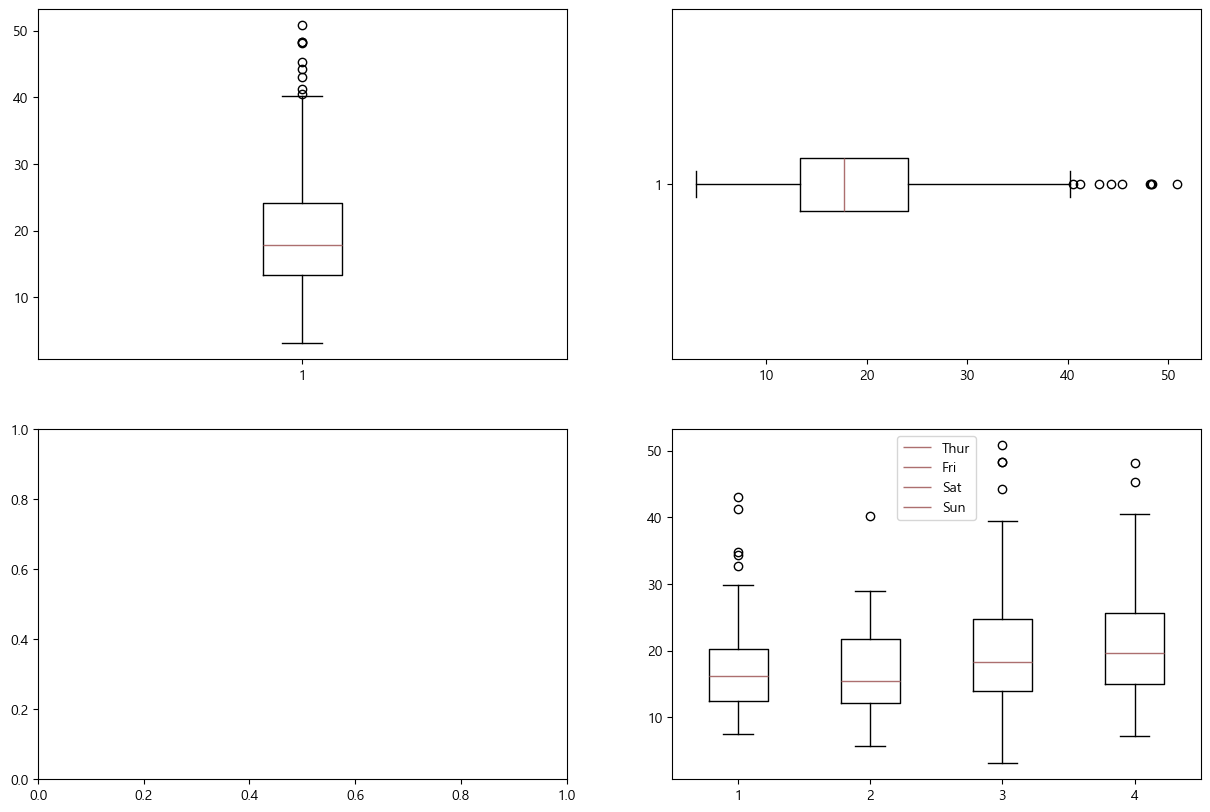

In [ ]:
# 박스
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# 기본
ax[0, 0].boxplot(tips['total_bill'])

ax[0, 1].boxplot(tips['total_bill'], vert=False)

week = ['Thur', 'Fri', 'Sat', 'Sun']
data = [ tips.loc[ tips['day'] == d, 'total_bill' ] for d in week ]
ax[1, 1].boxplot(data, label=week)
ax[1, 1].legend()


plt.show()

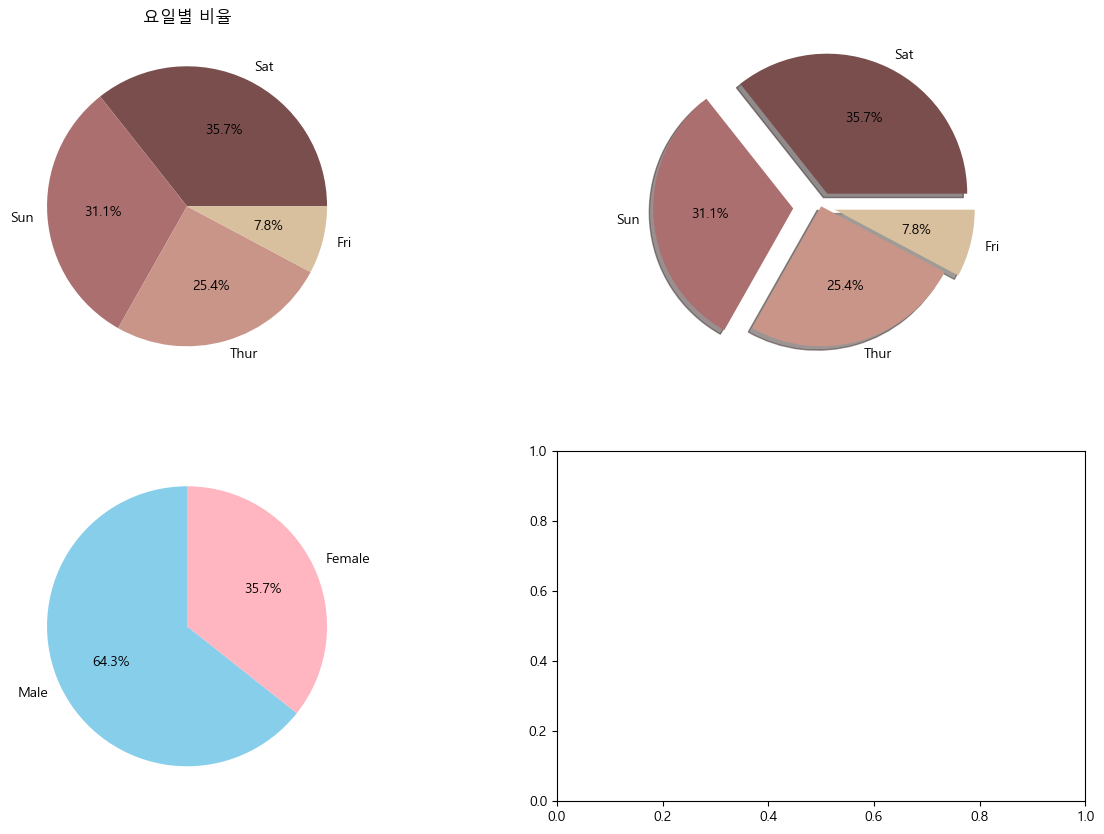

In [ ]:
# 원형 차트
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

day_count = tips['day'].value_counts()
ax[0, 0].pie(day_count.values, labels=day_count.index, autopct='%1.1f%%')
ax[0, 0].set_title('요일별 비율')

explode = (0.1, 0.2, 0, 0.1) # 분리할 설정 값 
ax[0, 1].pie(
  day_count.values, labels=day_count.index, autopct='%1.1f%%', explode=explode,
  shadow=True
)

sc = tips['sex'].value_counts()
ax[1, 0].pie(
  sc.values, labels=sc.index, colors=['skyblue', 'lightpink'], autopct='%1.1f%%',
  startangle=90
)


plt.show()

C:\Users\M\AppData\Local\Temp\ipykernel_14484\2887655937.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  dt = tips.pivot_table(index='day', columns='time', values='total_bill', aggfunc='sum')
C:\Users\M\AppData\Local\Temp\ipykernel_14484\2887655937.py:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sd = tips.pivot_table(index='sex', columns='day', values='tip', aggfunc='mean')


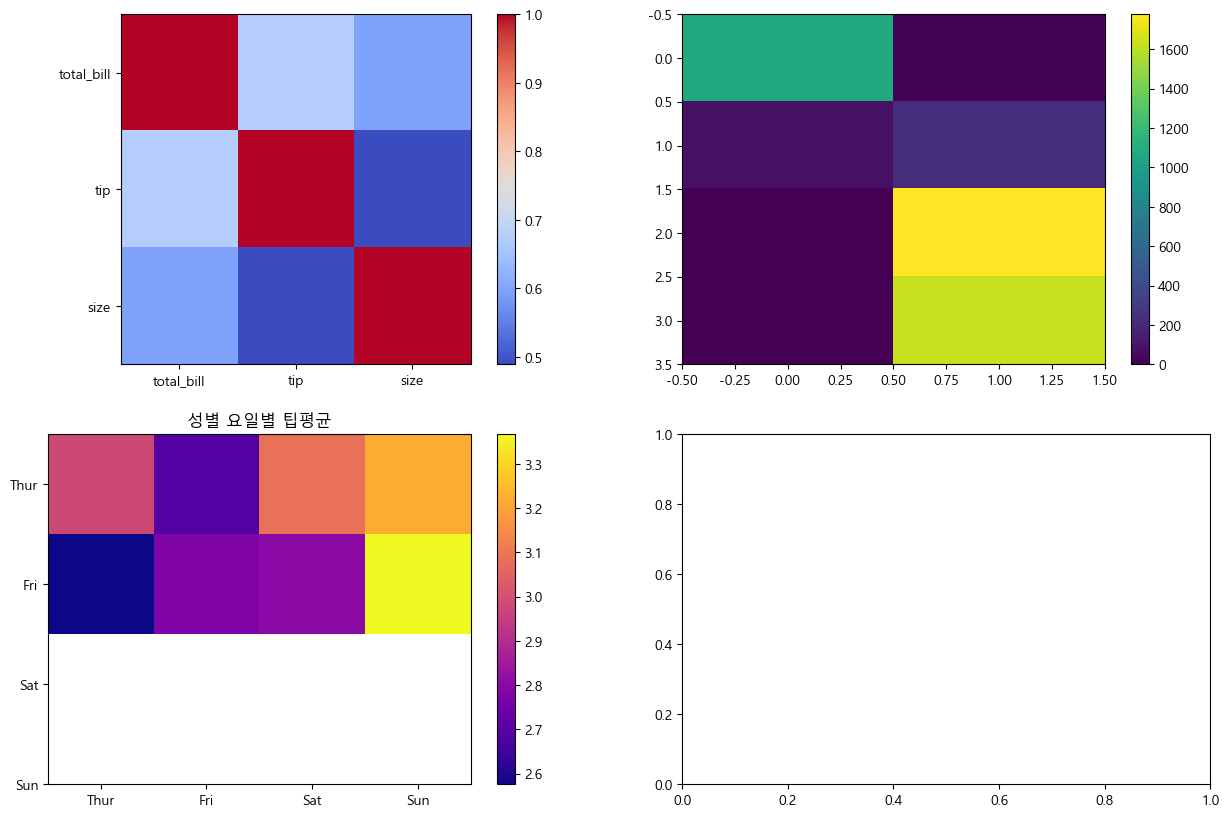

In [ ]:
# 히트맵
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

corr_data = tips[['total_bill', 'tip', 'size']].corr()

heat1 = ax[0, 0].imshow(corr_data, cmap='coolwarm')
ax[0, 0].set_xticks( range( len(corr_data.columns) ) )
ax[0, 0].set_yticks( range( len(corr_data.columns) ) )
ax[0, 0].set_xticklabels( corr_data.columns)
ax[0, 0].set_yticklabels( corr_data.columns)
plt.colorbar(heat1, ax=ax[0, 0])

# 요일별 시간대별 매출 히트맵
dt = tips.pivot_table(index='day', columns='time', values='total_bill', aggfunc='sum')
heat2 = ax[0, 1].imshow(dt.values, cmap='viridis', aspect='auto')
plt.colorbar(heat2, ax=ax[0, 1])

# 성별 요일별 팁 평균 히트맵
sd = tips.pivot_table(index='sex', columns='day', values='tip', aggfunc='mean')
heat3 = ax[1, 0].imshow(sd.values, cmap='plasma', aspect='auto')
ax[1, 0].set_title('성별 요일별 팁평균')
ax[1, 0].set_xticks(range(len(sd.columns)))
ax[1, 0].set_xticklabels(sd.columns)
ax[1, 0].set_yticks(range(len(sd.columns)))
ax[1, 0].set_yticklabels(sd.columns)
plt.colorbar(heat3, ax=ax[1, 0])


plt.show()

C:\Users\M\AppData\Local\Temp\ipykernel_14484\3623218291.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dt = tips.groupby('day')['total_bill'].sum()


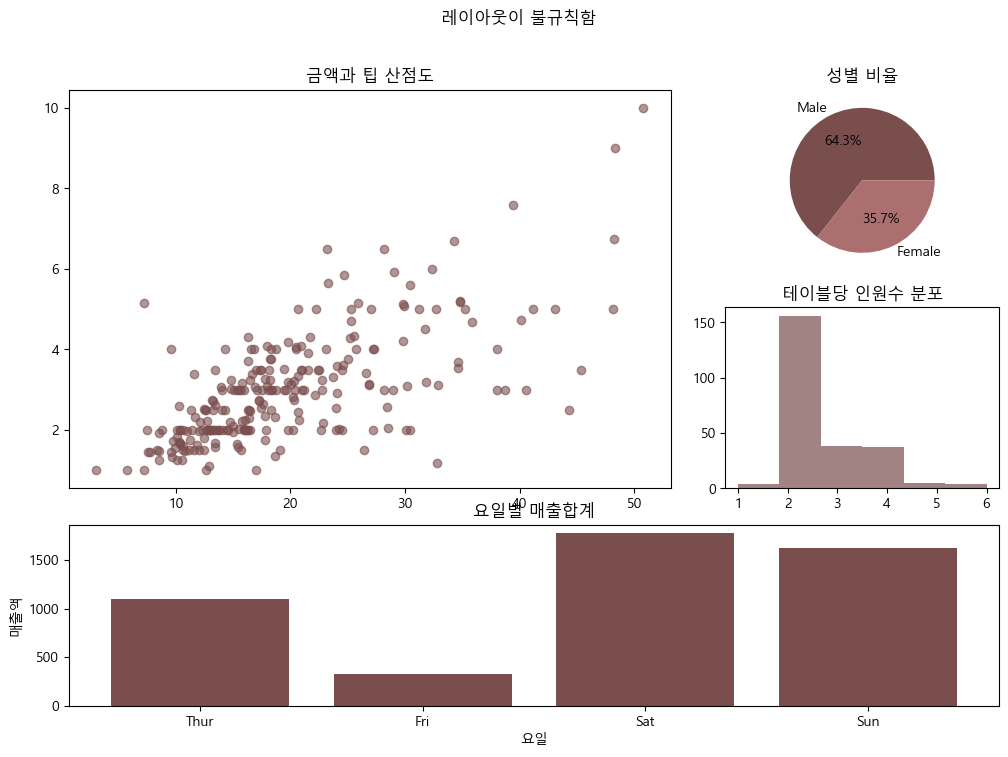

In [ ]:
# 불규칙적인 레이아웃
fig = plt.figure(figsize=(12, 8))
fig.suptitle('레이아웃이 불규칙함')

ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=2)
ax1.scatter(tips['total_bill'], tips['tip'], alpha=0.6)
ax1.set_title('금액과 팁 산점도')

ax2 = plt.subplot2grid((3, 3), (0, 2))
ax2.pie(tips['sex'].value_counts().values,
        labels=tips['sex'].value_counts().index,
        autopct='%1.1f%%'
        )
ax2.set_title('성별 비율')

ax3 = plt.subplot2grid((3, 3), (1, 2))
ax3.hist(tips['size'], bins=6, alpha=0.7)
ax3.set_title('테이블당 인원수 분포')

ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
dt = tips.groupby('day')['total_bill'].sum()
ax4.bar(dt.index, dt.values)
ax4.set_title('요일별 매출합계')
ax4.set_xlabel('요일')
ax4.set_ylabel('매출액')

plt.savefig('test1.png', dpi=300, bbox_inches='tight') # 해당 차트를 이미로해서 파일에 저장 

plt.show()